In [ ]:
import torch
from torch import nn



In [ ]:
a=0.3
b=0.7
## creating a tensor which
start = 0
end = 1
step =0.05
X = torch.arange(start ,end ,step).unsqueeze(dim=1) ## YOU JUST FILL THE TENSOR X WITH ALL OF THE POSSIBLE VALUES THAAT EXIST BETEWEN 0 AND 1 WITH STEP = 0.05
Y = a*X +b ## BUT RIGHT HERE YOU FILL THE Y TENSOR WITH THE ALL VALUES BETEWEN 0 AND 1 BUT USING THE LINEAR REGRESSION FORMULA Y = a*X +b
## X AND Y  both of em are  tensors and they the same dim
#####Y.ndim == X.ndim ### YOU SEE RIGHT HERE MAAN


In [ ]:
"""SO 100% OF THE DATASET WILL BE DIVIDED INTO TO SPLITS
1\\ IS THE TRAIN SET OR WE COULD CALL IT THE TRAINSPLIT WHICH WILL BE 80% of THE DATA THAT WE HAVE INITIALLY
2\\ IS THE TEST SET OR THE ALSO CALLED THE TESTSPLIT WHICH WILL 20% OF THEE DATA THAAT WE HADD
"""

### THIS IS THE MOST IMPORTANT THING IN ML
train_split = int(0.8*len(X))
x_train = X[:train_split]
x_test = X[train_split: ]
y_train =Y[:train_split]
y_test =Y[train_split: ]
###len(x_train),len(x_test ),len(y_train),len(y_test)


In [ ]:
import matplotlib.pyplot as plt
def plot_predictions(train_data = x_train,
                     train_labels = y_train,
                     test_data = x_test,
                     test_labels = y_test,
                     predictions = None ):
  plt.figure(figsize=(10,7))
  # THE TRAINING  DATA IN BLUE
  plt.scatter(train_data ,train_labels ,c='b',s=4,label ='TRAINING DATA')
  ## PLOT TESTING DATA IN GREEN
  plt.scatter(test_data ,test_labels ,c='g',s=4,label = 'TESTING DATA')
  ## ARE THERE PREDICTIONS IF YES PLOT IT
  if predictions is not None :
     # plot predictions in what color :::::::red
     plt.scatter(test_data , predictions ,c='r',s=4,label = 'PREDICTIONS' )

  ## show the legends
  plt.legend(prop={"size":4})


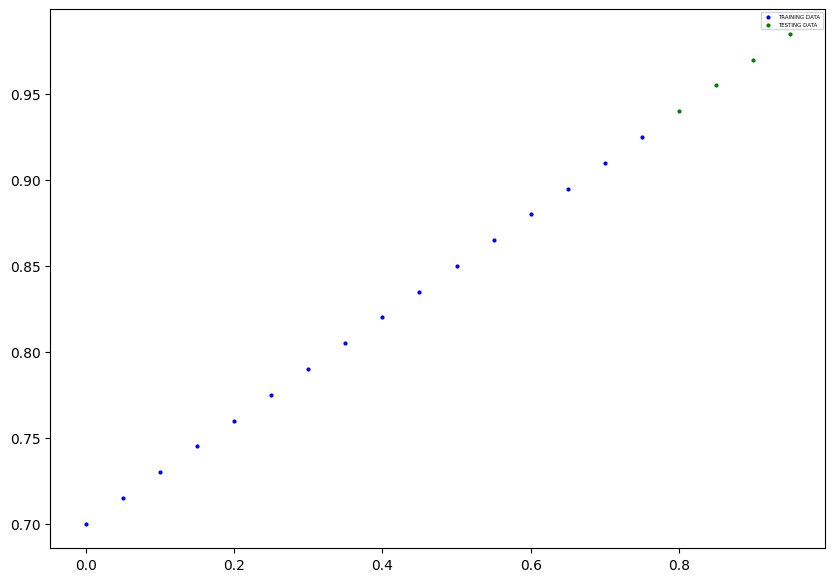

In [ ]:
plot_predictions()

In [ ]:
### LET'S BUILD OUR FIRST MODEL
class LinearRegressionM(nn.Module): ## subclass
  def __init__(self):
    super().__init__()
    self.a = nn.Parameter(torch.randn(1,requires_grad=True,
                                      dtype=torch.float))
    self.b = nn.Parameter(torch.randn(1,requires_grad = True,
                                      dtype= torch.float))
  def forward(self , x:torch.tensor)->torch.tensor: ## x is the input data
      return self.a*x +self.b ## formule



In [ ]:
### HERE WHAT THE MODEL WILL DO DILL START WITH 2 RANDOM VALUES OF A AND B THAN ADJUST THEM THROUGHT WHAT
## THROUGH LOOKING AT THE TRAIN_DATA
## creat  a random seed
torch.manual_seed(42)
## creat an instance of the model (this is a subclass of nn)
model_0 = LinearRegressionM()
list(model_0.parameters
     ())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
## ANOTHER WAY TO PRINT  THE PARAMETERS MORE CLEAR
model_0.state_dict()

OrderedDict([('a', tensor([0.3367])), ('b', tensor([0.1288]))])

In [ ]:
y_test

tensor([[0.9400],
        [0.9550],
        [0.9700],
        [0.9850]])

In [ ]:
##making predictions using ''''''' inference_mode()'''
##to check our model predictive power let's see how it will predict y_test based on x_test
## when pass data in our model  it's going to run it through the forword methode
with torch.inference_mode ():
  y_preds =model_0(x_test)
y_preds
## you can also do something simillar with torch.no_grad() however torch.inference_mode()is preferrd

tensor([[0.3982],
        [0.4150],
        [0.4318],
        [0.4487]])

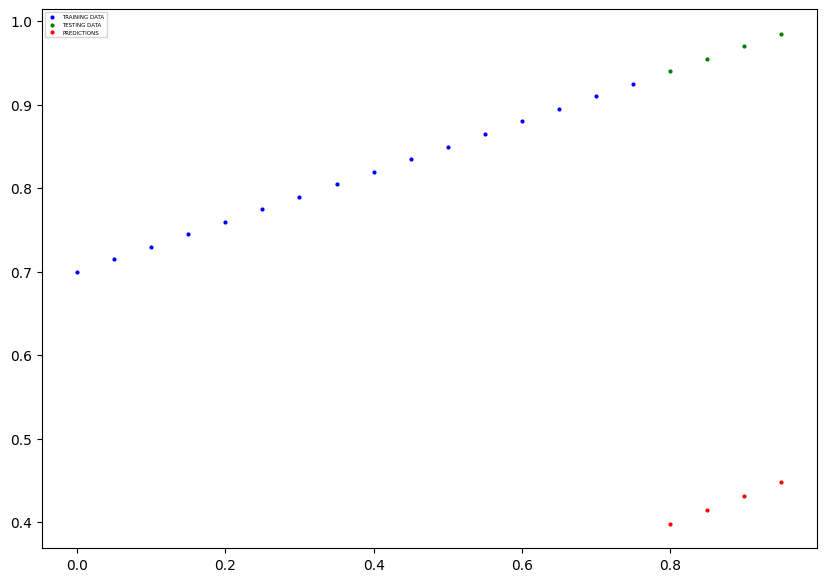

In [ ]:
plot_predictions(predictions = y_preds) ##" the model is too stupid"

In [ ]:
## one way to measure how wrong or poor your models predictions are is to use the loss function
## they may call it the cost function or creitreian in differents areas
## OPTIMIZER :takes into acount the loss of a model and adjust the model parameters ( a and b in this eg) to imporove the loss function
## and specifcally for pytorch we need a
## TESTING LOOP
## TRAINIG LOOP


In [ ]:
## SETUP A LOSS FUNCTION
loss_fn = nn.L1Loss()
## setup un optimizer SGD
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01 )## lr stand for learning rate possibly the most important hyperparamters you can set

In [ ]:
## an epoch is one loop through the data
torch.manual_seed(42)
epochs = 1000
## loop through the data
for epoch in range(epochs):
  ## set the model to the training mode
  model_0.train() ##train mode in pytorch sets all parameters that requires gradiants to requirers gradients
   ### turn of the gradiants traking
  ###1 forward pass
  y_pred = model_0(x_train)
  ## 2 calculate the loss
  loss = loss_fn(y_pred,y_train)
  print("the loss is ",loss)

  ##3 optimizer zero grad
  optimizer.zero_grad()
  ##4 performe backpropagation on the loss with respect to the paramters of the model
  loss.backward()
  ## 5 set the optimzer
  optimizer.step()

  ## TESTING
  model_0.eval()
  with torch.inference_mode():
    test_preds = model_0(x_test)
    test_loss = loss_fn(test_preds , y_test)
  if epoch % 10 == 0:
    print(f"epoch  : {epoch} | loos : {loss} |test_loss {test_loss} ")
    print(model_0.state_dict())


the loss is  tensor(0.5574, grad_fn=<MeanBackward0>)
epoch  : 0 | loos : 0.557431697845459 |test_loss 0.5258052945137024 
OrderedDict([('a', tensor([0.3404])), ('b', tensor([0.1388]))])
the loss is  tensor(0.5460, grad_fn=<MeanBackward0>)
the loss is  tensor(0.5346, grad_fn=<MeanBackward0>)
the loss is  tensor(0.5232, grad_fn=<MeanBackward0>)
the loss is  tensor(0.5118, grad_fn=<MeanBackward0>)
the loss is  tensor(0.5004, grad_fn=<MeanBackward0>)
the loss is  tensor(0.4890, grad_fn=<MeanBackward0>)
the loss is  tensor(0.4776, grad_fn=<MeanBackward0>)
the loss is  tensor(0.4662, grad_fn=<MeanBackward0>)
the loss is  tensor(0.4548, grad_fn=<MeanBackward0>)
the loss is  tensor(0.4434, grad_fn=<MeanBackward0>)
epoch  : 10 | loos : 0.44336917996406555 |test_loss 0.3929927349090576 
OrderedDict([('a', tensor([0.3779])), ('b', tensor([0.2388]))])
the loss is  tensor(0.4320, grad_fn=<MeanBackward0>)
the loss is  tensor(0.4206, grad_fn=<MeanBackward0>)
the loss is  tensor(0.4092, grad_fn=<MeanB

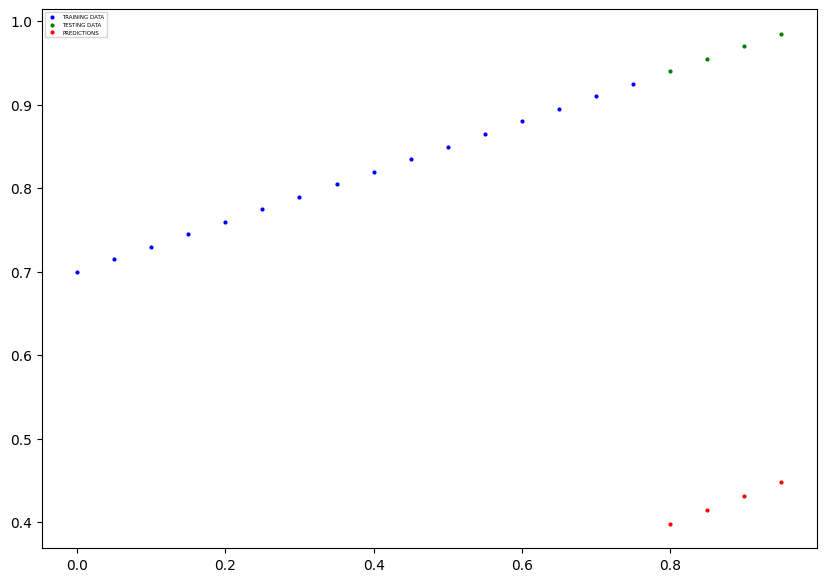

In [ ]:
plot_predictions(predictions = y_preds)

In [ ]:
with torch.inference_mode():
  y_pred_new = model_0(x_test)
y_pred_new

tensor([[0.9392],
        [0.9545],
        [0.9698],
        [0.9852]])

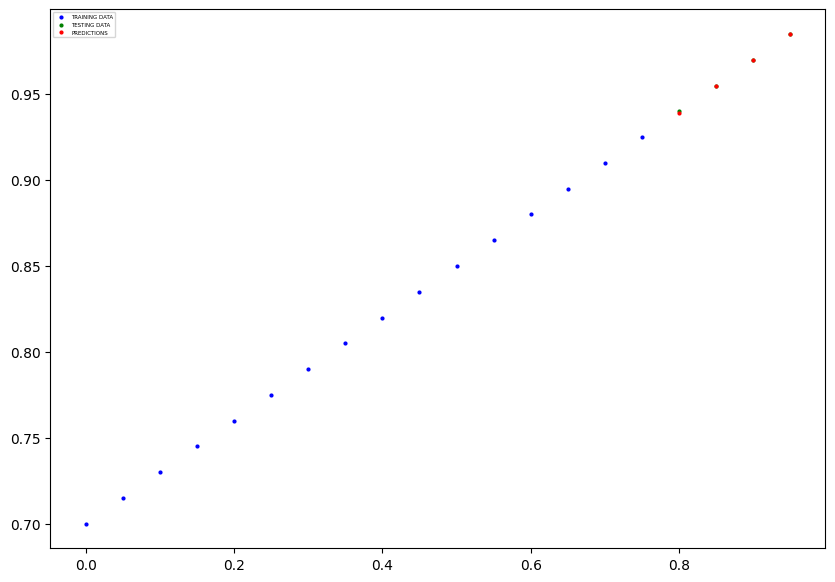

In [ ]:
plot_predictions(predictions = y_pred_new)

In [ ]:
### saving the model that we had
from  pathlib import Path
#1\ FIRST THING CREAT YOUR MODEL DIRECTORY
MODEL_PATH = Path(model)
MODEL_PATH.mkdir(parents = True ,exsit = True )

## 2\create the model  and save the path
MODEL_NAME = 'linearRM.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
###3\ SAVE THE MODEL THAT WE HAD
torch.save(obj = model_0.sate_dict(),f = MODEL_SAVE_PATH)



NameError: name 'model' is not defined

In [ ]:
from pathlib import Path
import torch

# 1. Create your model directory
MODEL_PATH = Path('models')  # Corrected from 'path' to 'Path'
MODEL_PATH.mkdir(parents=True, exist_ok=True)  # Corrected 'exsit' to 'exist'

# 2. Define the model name and save path
MODEL_NAME = 'linearRM.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dictionary
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


In [ ]:
### laod the model
##1\ create a new instance of the same class that  we had
model_loaded = LinearRegressionM()
##2\ load the state dict
model_loaded.load_state_dict(torch.load(MODEL_SAVE_PATH))

In [ ]:
model_loaded.state_dict()

NameError: name 'model_loaded' is not defined